In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import random

In [9]:
class arms:
    def __init__(me,delta,T):
        me.arm1=random.normal(loc=0, scale=1, size=T)
        me.arm2=random.normal(loc=delta, scale=1, size=T)
        
    def getarms(me):
        return [me.arm1,me.arm2]
    def getloss(me, it):
        return [me.arm1[it],me.arm2[it]]

In [6]:
class bandits:
    def __init__(me):
        me.mean1=0
        me.count1=0
        me.mean2=0
        me.count2=0
    
    def update(me,loss,arm):
        if arm==1:
            updt= me.mean1*me.count1+loss
            me.count1+=1
            me.mean1=updt/me.count1
        elif arm==2: 
            updt= me.mean1*me.count2+loss
            me.count2+=1
            me.mean2=updt/me.count2
        else:
            pass
            
    def fullupdate(me,lossvec):
        me.update(lossvec[0],1)
        me.update(lossvec[1],2)
        
    def returnarm(me):
        return me.mean1, me.mean2

In [10]:
arm=arms(0.1,1000)
# bandit=bandits()
a=np.sum(arm.getarms())
a

106.74890652698062

In [11]:
bandit.returnarm()


NameError: name 'bandit' is not defined

In [ ]:
arm

In [12]:
def optimalGETC(T,delta):
    answer=4/(delta**2)*math.log(T*delta**2/4)
    answer=math.ceil(answer)
    return answer

In [13]:
optimalGETC(1000,0.1) 

367

In [208]:
def GETC(delta,T=1000):
    loss=0
    loss1=0
    loss2=0
    arm=arms(delta,T)
    known_bandits=bandits()
    full_bandits=bandits()
    m=optimalGETC(T,delta)
    chk=0
    for t in range(T):
        lossvec=arm.getloss(t)
        loss1+=lossvec[0]
        loss2+=lossvec[1]
        full_bandits.fullupdate(lossvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i)
            
        else:#t>mK
            if chk==0:
                i=np.argmin(known_bandits.returnarm())+1
                chk=1
                print(known_bandits.returnarm())
            #print(i)
            loss+=lossvec[i-1]
            known_bandits.update(lossvec[i-1],i)
    print(i) 
    print(known_bandits.returnarm())
    print([loss1,loss2,loss])
    print(full_bandits.returnarm())
    regret=loss-np.amin([loss1,loss2])
    return regret
            
        
        
        
    

In [232]:
GETC(0.1)

(0.017090006577859515, 0.020242379026365425)
1
(0.017043503058345087, 0.020242379026365425)
[15.290802638806067, 79.93551542716756, 62.51012478268491]
(0.01529080263880606, 0.01581096256503795)


47.21932214387884

In [236]:
def GETC0(delta,T=1000,T_o=367,arms=[0 for k in range(1000)]):
    loss=0
    loss1=0
    loss2=0
    arm=arms(delta,T)
    known_bandits=bandits()
    full_bandits=bandits()
    m=T_o
    chk=0
    for t in range(T):
        rewvec=arm.getrew(t)
        reward1+=rewvec[0]
        reward2+=rewvec[1]
#         full_bandits.fullupdate(rewvec)
        if t<=2*m:#m multiplied by number of arms
            i=t%2+1
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
            
        else:#t>mK
            if chk==0:
                i=np.argmax(known_bandits.returnarm())+1
                chk=1
            #print(i)
            reward+=rewvec[i-1]
            known_bandits.update(rewvec[i-1],i)
#     print(i) 
#     print(known_bandits.returnarm())
#     print([reward1,reward2,reward])
    regret=np.amax([reward1,reward2]) -reward
    return regret
            
        
        
        
    

In [237]:
from tqdm import tqdm
median=[0 for i in range(1000)]
maxi=[-22 for i in range(1000)]
mini=[22 for i in range(1000)]
for i in tqdm(range(1000)):
    arm=arms(0.1,1000)
    for j in range (1000):
        reg=GETC0(0.1,1000,i,arm)
        median[i]+=reg
        if reg>maxi[i]:
            maxi[i]=reg
        elif reg<mini[i]:
            mini[i]=reg

    median[i]=median[i]/1000
        

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [1:25:09<00:00,  5.11s/it]


In [49]:
median[367]

57.29074438480148

In [40]:
import pickle


In [43]:
filename = 'mini1'
outfile = open(filename,'wb')

In [44]:
pickle.dump(mini,outfile)
outfile.close()

In [45]:
GETC(0.1,10000)

2
(0.024877811677222014, 0.024891642593219635)
[80.57562170877593, 1089.223977299252, 969.544937866313]


119.67903943293902

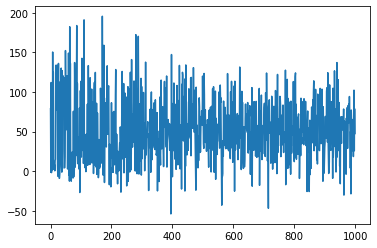

In [238]:
plt.plot(median)

In [ ]:
# Create the bins and histogram
count, bins, ignored = plt.hist(arm.arm1, 10, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *   np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.show()

In [56]:
ban=bandits()

In [134]:
ban.update(2,1)

In [62]:
ban.update(1,2)

In [139]:
ban.returnarm()

(1.8805970149253732, 1.0)